# Simulating pore with varying tether length
The basic set-up of these simulations is that I simulate the motion of the pore (190604_TC_pore_cinch1.json) and the tether when the ends of the tether are fixed. Essentially this is simulating the motion of the pore relative to the barrel. For these simulations I change the number of nucleotides in the tether. The cinches / connectors are excluded from these simulations.

The end nucleotides of the tether are fixed at a distance of $19.6\,$nm apart corresponding to the inner diameter of the barrel. The barrel was simulated by force planes of 8 force planes arranged to form a regular Octagon, when viewed from above. This is an approximation to a cylinder of diameter $19.6\,$nm.

When I refer to the length of the tether I mean the number of nucleotides between where the tether joins the pore and where the tether joins the barrel. The total number of nucleotides in the tether is double this.

The lengths of simulations are quite short at the moment as I have just been using my personal machine but next I will run on a cluster to simulate longer time-scales. Essentially, these results are a proof of concept of what I kind of analysis we can do. 

At this stage I am simulating with the following parameters:
- Length of simulation $0.03\,$ms.
- Molecular Dynamics simulations are performed (the other option is Monte Carlo)
- Temperature $300\,$K
- Salt concentration $0.5\,$M

Other than this I use the default oxDNA model and parameters described here (https://dna.physics.ox.ac.uk/index.php/DNA_model_introduction).

The layout of this document is a simple analysis of the distribution of positions and velocities of the pore inside the barrel. This is supported by snapshots of the simulations and simple movies. You can ignore the code I use to produce the figures and simply look at the figures, videos and my brief discussions surrounding them.

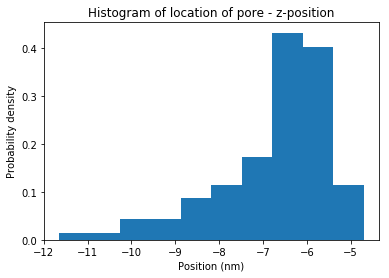

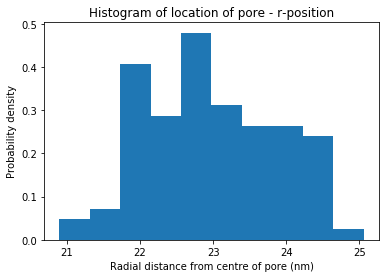

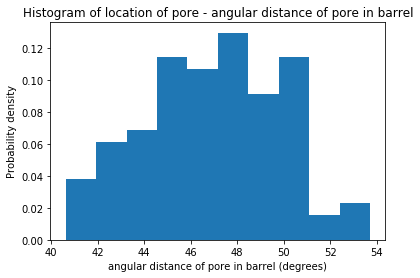

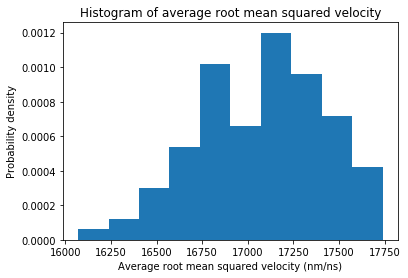

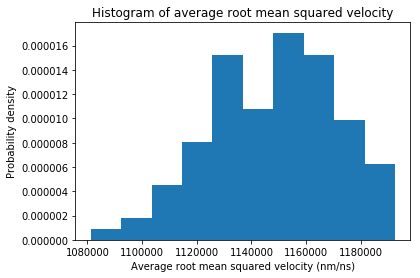

In [61]:
'''
Import data for tether length 20
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('len20/all_nt.txt')

teth_len   = 20
scaf_start = 0
scaf_end   = 593-40 + teth_len*2

#What type of data I store
pos = 1
vel = 1
rot = 1

#Get x-position, y-position, z-position

#nucleotide to track
nt = np.arange(teth_len + scaf_start, scaf_end - teth_len)#np.array([300, 310])
#nt = 300

#Define positions
xpos = data[:,0 + 3*nt*(pos + vel + rot)] 
ypos = data[:,1 + 3*nt*(pos + vel + rot)] 
zpos = data[:,2 + 3*nt*(pos + vel + rot)] 

#Get velocities
xvel = data[:,3 + 3*nt*(pos + vel + rot)] 
yvel = data[:,4 + 3*nt*(pos + vel + rot)] 
zvel = data[:,5 + 3*nt*(pos + vel + rot)] 

#Get angular velocities
xrot = data[:,6 + 3*nt*(pos + vel + rot)] 
yrot = data[:,7 + 3*nt*(pos + vel + rot)] 
zrot = data[:,8 + 3*nt*(pos + vel + rot)] 

#centre of barrel
xc = (61.5 + 38.5)/2
yc = 50
zc = 50
lengthToNm = 0.8518 
timeTons   = 3.03e-3

#Shift positions to centre around centre of barrel and rescale
xpos = (xpos - xc)*lengthToNm
ypos = (ypos - yc)*lengthToNm
zpos = (zpos - zc)*lengthToNm

#Take mean
xpos = np.mean(xpos,1)
ypos = np.mean(ypos,1)
zpos = np.mean(zpos,1)

xvel = np.mean(xvel,1)*lengthToNm/timeTons
yvel = np.mean(yvel,1)*lengthToNm/timeTons
zvel = np.mean(zvel,1)*lengthToNm/timeTons

xrot = np.mean(xrot,1)/timeTons/np.pi*180
yrot = np.mean(yrot,1)/timeTons/np.pi*180
zrot = np.mean(zrot,1)/timeTons/np.pi*180

vRMS = RMS(xvel,yvel,zvel)
wRMS = RMS(xrot,yrot,zrot)

#convert to cylindrical coordinates
rpos    = np.sqrt(xpos**2 + ypos**2)
thetpos = np.arctan(ypos/xpos)/np.pi*180


plt.figure()
plt.hist(zpos, density = True)
plt.xlabel('Position (nm)')
plt.ylabel('Probability density')
plt.title('Histogram of location of pore - z-position')
plt.show()

plt.figure()
plt.hist(rpos, density = True)
plt.xlabel('Radial distance from centre of pore (nm)')
plt.ylabel('Probability density')
plt.title('Histogram of location of pore - r-position')
plt.show()

plt.figure()
plt.hist(thetpos, density = True)
plt.xlabel('angular distance of pore in barrel (degrees)')
plt.ylabel('Probability density')
plt.title('Histogram of location of pore - angular distance of pore in barrel')
plt.show()

plt.figure()
plt.hist(vRMS, density = True)
plt.xlabel('Average root mean squared velocity (nm/ns)')
plt.ylabel('Probability density')
plt.title('Histogram of average root mean squared velocity')
plt.show()

plt.figure()
plt.hist(wRMS, density = True)
plt.xlabel('Average root mean squared velocity (nm/ns)')
plt.ylabel('Probability density')
plt.title('Histogram of average root mean squared velocity')
plt.show()


def RMS(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

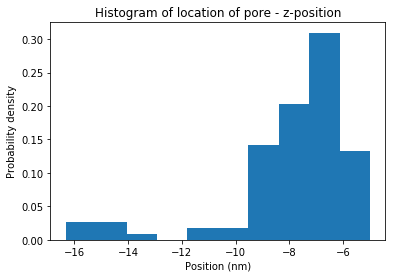

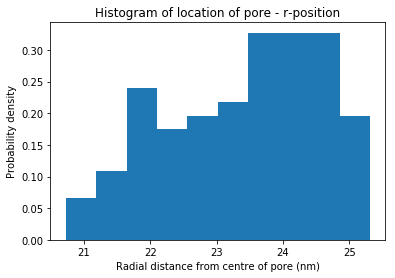

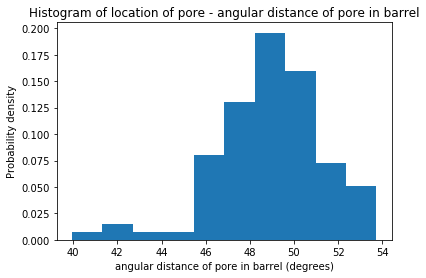

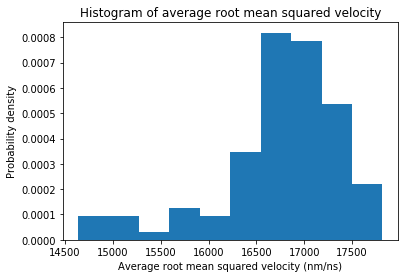

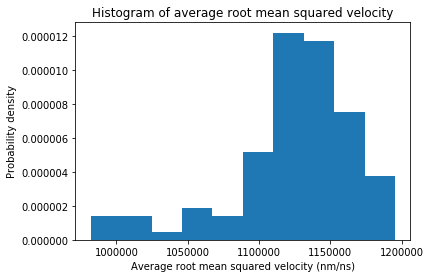

In [64]:
'''
Import data for tether length 30
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('len30/all_nt.txt')

teth_len   = 30
scaf_start = 0
scaf_end   = 593-40 + teth_len*2

#What type of data I store
pos = 1
vel = 1
rot = 1

#Get x-position, y-position, z-position

#nucleotide to track
nt = np.arange(teth_len + scaf_start, scaf_end - teth_len)#np.array([300, 310])
#nt = 300

#Define positions
xpos = data[:,0 + 3*nt*(pos + vel + rot)] 
ypos = data[:,1 + 3*nt*(pos + vel + rot)] 
zpos = data[:,2 + 3*nt*(pos + vel + rot)] 

#Get velocities
xvel = data[:,3 + 3*nt*(pos + vel + rot)] 
yvel = data[:,4 + 3*nt*(pos + vel + rot)] 
zvel = data[:,5 + 3*nt*(pos + vel + rot)] 

#Get angular velocities
xrot = data[:,6 + 3*nt*(pos + vel + rot)] 
yrot = data[:,7 + 3*nt*(pos + vel + rot)] 
zrot = data[:,8 + 3*nt*(pos + vel + rot)] 

#centre of barrel
xc = (61.5 + 38.5)/2
yc = 50
zc = 50
lengthToNm = 0.8518 
timeTons   = 3.03e-3

#Shift positions to centre around centre of barrel and rescale
xpos = (xpos - xc)*lengthToNm
ypos = (ypos - yc)*lengthToNm
zpos = (zpos - zc)*lengthToNm

#Take mean
xpos = np.mean(xpos,1)
ypos = np.mean(ypos,1)
zpos = np.mean(zpos,1)

xvel = np.mean(xvel,1)*lengthToNm/timeTons
yvel = np.mean(yvel,1)*lengthToNm/timeTons
zvel = np.mean(zvel,1)*lengthToNm/timeTons

xrot = np.mean(xrot,1)/timeTons/np.pi*180
yrot = np.mean(yrot,1)/timeTons/np.pi*180
zrot = np.mean(zrot,1)/timeTons/np.pi*180

vRMS = RMS(xvel,yvel,zvel)
wRMS = RMS(xrot,yrot,zrot)

#convert to cylindrical coordinates
rpos    = np.sqrt(xpos**2 + ypos**2)
thetpos = np.arctan(ypos/xpos)/np.pi*180


plt.figure()
plt.hist(zpos, density = True)
plt.xlabel('Position (nm)')
plt.ylabel('Probability density')
plt.title('Histogram of location of pore - z-position')
plt.show()

plt.figure()
plt.hist(rpos, density = True)
plt.xlabel('Radial distance from centre of pore (nm)')
plt.ylabel('Probability density')
plt.title('Histogram of location of pore - r-position')
plt.show()

plt.figure()
plt.hist(thetpos, density = True)
plt.xlabel('angular distance of pore in barrel (degrees)')
plt.ylabel('Probability density')
plt.title('Histogram of location of pore - angular distance of pore in barrel')
plt.show()

plt.figure()
plt.hist(vRMS, density = True)
plt.xlabel('Average root mean squared velocity (nm/ns)')
plt.ylabel('Probability density')
plt.title('Histogram of average root mean squared velocity')
plt.show()

plt.figure()
plt.hist(wRMS, density = True)
plt.xlabel('Average root mean squared velocity (nm/ns)')
plt.ylabel('Probability density')
plt.title('Histogram of average root mean squared velocity')
plt.show()


def RMS(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

# Future work
- I was using random sequences so I can try varying the tether sequence to avoid hairpins that were observed in some simulations. 
- Also soon I will try this with cinches / handles to see if I can explain why the cinches weren't very effective.Â 